In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/modeling_data.csv", nrows=1000_000)

train_df

,Unnamed: 0,fare_amount,passenger_count,log_date,log_time,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,0,4.5,1,2009-06-15,17:26:21,17,26,2009,6,15,0,1,0,1,1,1,1,412.061196
1,1,16.9,1,2010-01-05,16:52:16,16,52,2010,1,5,0,1,0,2,1,1,1,4646.229208
2,2,5.7,2,2011-08-18,00:35:00,0,35,2011,8,18,0,0,1,4,1,1,1,1004.797031
3,3,7.7,1,2012-04-21,04:30:42,4,30,2012,4,21,0,0,1,6,0,1,1,914.153776
4,4,5.3,1,2010-03-09,07:51:00,7,51,2010,3,9,1,0,0,2,1,0,1,1366.163592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,5.7,5,2011-01-14,13:55:00,13,55,2011,1,14,1,0,0,5,1,0,2,870.509800
999996,999996,10.5,1,2012-07-20,12:59:16,12,59,2012,7,20,1,0,0,5,1,0,1,2277.239678
999997,999997,6.5,1,2013-07-01,09:10:00,9,10,2013,7,1,1,0,0,1,1,0,1,628.284955
999998,999998,17.5,3,2013-09-24,23:28:00,23,28,2013,9,24,0,0,1,2,1,1,1,2803.616297


In [3]:
train_df = train_df.drop(columns = ['Unnamed: 0', 'log_date', 'log_time'])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   fare_amount      1000000 non-null  float64
 1   passenger_count  1000000 non-null  int64  
 2   log_hour         1000000 non-null  int64  
 3   log_min          1000000 non-null  int64  
 4   log_year         1000000 non-null  int64  
 5   log_month        1000000 non-null  int64  
 6   log_day          1000000 non-null  int64  
 7   7to15            1000000 non-null  int64  
 8   16to19           1000000 non-null  int64  
 9   20to6            1000000 non-null  int64  
 10  dayofweek        1000000 non-null  int64  
 11  weekday          1000000 non-null  int64  
 12  is_extracharge   1000000 non-null  int64  
 13  taxi_amount      1000000 non-null  int64  
 14  dist             1000000 non-null  float64
dtypes: float64(2), int64(13)
memory usage: 114.4 MB


#### 최종 모델에 적합

In [4]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns = ['fare_amount'])
y = train_df['fare_amount']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [6]:
dtrain = xgb.DMatrix(train_X, label =train_y)
dvalid = xgb.DMatrix(valid_X)

In [7]:
params = {
        'max_depth' : 7,
        'lambda' : 10,
        'scale_pos_weight' : 3
    }

In [8]:
xgb_model = xgb.train(params, dtrain)

xgb_pred = xgb_model.predict(dvalid)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

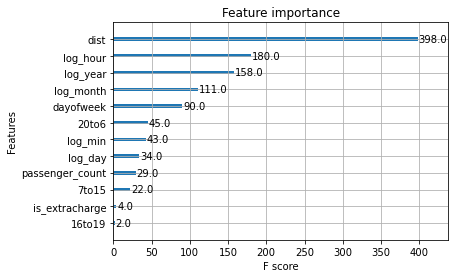

In [9]:
plot_importance(xgb_model)

#### 성능 확인

In [10]:
MAE = mean_absolute_error(valid_y, xgb_pred)
MSE = mean_squared_error(valid_y, xgb_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 2.80115
MSE = 25.91926


#### test 데이터셋 적용시켜 예측

In [14]:
test_df = pd.read_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/test3.csv")

test_df

,Unnamed: 0,key,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,0,2015-01-27 13:08:24.0000002,1,13,8,2015,1,27,1,0,0,2,1,0,1,1094.593298
1,1,2015-01-27 13:08:24.0000003,1,13,8,2015,1,27,1,0,0,2,1,0,1,1474.196242
2,2,2011-10-08 11:53:44.0000002,1,11,53,2011,10,8,1,0,0,6,0,0,1,357.075676
3,3,2012-12-01 21:12:12.0000002,1,21,12,2012,12,1,0,0,1,6,0,1,1,1150.115807
4,4,2012-12-01 21:12:12.0000003,1,21,12,2012,12,1,0,0,1,6,0,1,1,2875.803386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,9909,2015-05-10 12:37:51.0000002,6,12,37,2015,5,10,1,0,0,7,0,0,2,1484.303484
9910,9910,2015-01-12 17:05:51.0000001,6,17,5,2015,1,12,0,1,0,1,1,1,2,1843.581309
9911,9911,2015-04-19 20:44:15.0000001,6,20,44,2015,4,19,0,0,1,7,0,1,2,22663.426643
9912,9912,2015-01-31 01:05:19.0000005,6,1,5,2015,1,31,0,0,1,6,0,1,2,5567.288310


In [15]:
test_df = test_df.drop(columns = ['Unnamed: 0', 'key'])

dtest = xgb.DMatrix(test_df)

xgb_pred = xgb_model.predict(dtest)

xgb_pred

array([ 8.137362,  9.091423,  5.355594, ..., 53.342487, 18.61305 ,
        8.649694], dtype=float32)

#### 제출용 데이터셋 생성

In [16]:
sub_df = pd.read_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/test3.csv")
sub_df['fare_amount'] = xgb_pred
sub_df = sub_df[['key', 'fare_amount']]
sub_df = sub_df.set_index(['key'])

sub_df

,fare_amount
key,
2015-01-27 13:08:24.0000002,8.137362
2015-01-27 13:08:24.0000003,9.091423
2011-10-08 11:53:44.0000002,5.355594
2012-12-01 21:12:12.0000002,7.948165
2012-12-01 21:12:12.0000003,12.582137
...,...
2015-05-10 12:37:51.0000002,9.055474
2015-01-12 17:05:51.0000001,9.921498
2015-04-19 20:44:15.0000001,53.342487
